# 폐암환자 생존률 예측+추가callbacks+history

### 데이터 탐색

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload() 
filename = list(uploaded.keys())[0]
filename #ThoraricSurgery.csv

Saving ThoraricSurgery.csv to ThoraricSurgery.csv


'ThoraricSurgery.csv'

In [ ]:
Data_set = np.loadtxt(filename, delimiter=",")
Data_set[:3, :]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,  12.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   1.  ,  14.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19,   2.5 ,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,  11.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,
         66.  ,   1.  ]])

### 데이터 정규화 및 데이터셋만들기(Train, test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(Data_set[:, :-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, Data_set[:, -1], stratify=Data_set[:, -1], random_state=seed
)
X_train.shape, X_test.shape
#결과값 ((352, 17), (118, 17))

((352, 17), (118, 17))

### 모델 정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(24, input_shape=(17,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                432       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델컴파일
model.compile(loss='binary_crossentropy', #이진분류니까
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델저장관련 환경설정
import os #디렉토리명령어
MODEL_DIR = './model/' #모델디렉토리
if not os.path.exists(MODEL_DIR):#없으면만들어라
    os.mkdir(MODEL_DIR)

In [ ]:
!ls -l

total 32
drwxr-xr-x 2 root root  4096 Feb 10 03:16 model
drwxr-xr-x 1 root root  4096 Feb  4 15:26 sample_data
-rw-r--r-- 1 root root 21257 Feb 10 03:02 ThoraricSurgery.csv


In [ ]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
#monitor='val_loss' 4가지중선택가능
#verbose=1 최소한보여줌/ 0안보여줌/ 2다보여줌
#save_best_only=True 물어보고이전보다좋으면저장, 아니면 모두다저장함;
# 자동 중단 설정

In [ ]:
# 모델학습 및 histoty에저장
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=10, 
                    verbose=0, callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.64032, saving model to ./model/best001-0.6403.hdf5

Epoch 00002: val_loss improved from 0.64032 to 0.61600, saving model to ./model/best002-0.6160.hdf5

Epoch 00003: val_loss improved from 0.61600 to 0.60850, saving model to ./model/best003-0.6085.hdf5

Epoch 00004: val_loss improved from 0.60850 to 0.59638, saving model to ./model/best004-0.5964.hdf5

Epoch 00005: val_loss improved from 0.59638 to 0.59240, saving model to ./model/best005-0.5924.hdf5

Epoch 00006: val_loss improved from 0.59240 to 0.59186, saving model to ./model/best006-0.5919.hdf5

Epoch 00007: val_loss improved from 0.59186 to 0.58784, saving model to ./model/best007-0.5878.hdf5

Epoch 00008: val_loss improved from 0.58784 to 0.58056, saving model to ./model/best008-0.5806.hdf5

Epoch 00009: val_loss improved from 0.58056 to 0.57571, saving model to ./model/best009-0.5757.hdf5

Epoch 00010: val_loss improved from 0.57571 to 0.57151, saving model to ./model/best010-0.5715

In [ ]:
#잘못된평가? 베스트모델로한것이아닌데도 0.8475
acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8390
Accuracy: 0.8390


In [ ]:
#베스트모델로평가해도 0.8475
from tensorflow.keras.models import load_model

#best_model = load_model('./model/best011-0.4542.hdf5') #베스트모델불러온다음에 acc 0.8475
best_model = load_model('./model/best021-0.5392.hdf5') #epochs500으로늘려서 51회에서종료 ./model/best021-0.5392.hdf5 같은결과 acc0.8475
acc = best_model.evaluate(X_test, y_test) 
print(f'Accuracy: {acc[1]:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.8475
Accuracy: 0.8475


### 학습 과정 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_vloss=history.history['val_loss'] # y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_acc=history.history['accuracy'] # y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_vacc=history.history['val_accuracy']
y_loss=history.history['loss']

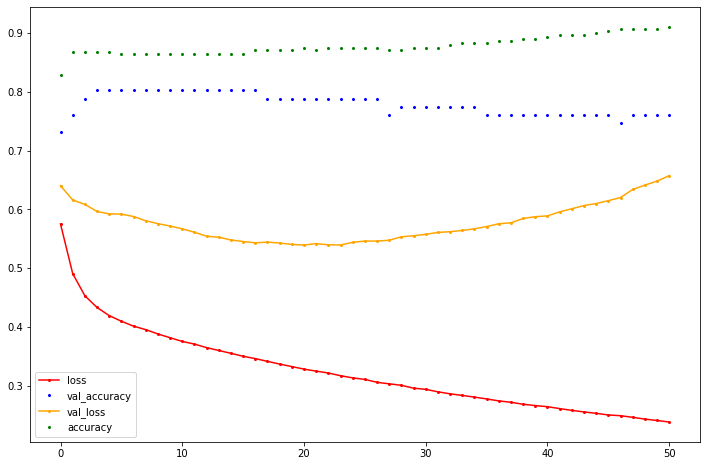

In [ ]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_loss, "o-", c="red", markersize=2, label='loss')
plt.plot(x_len, y_vacc, "o", c="blue", markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "o-", c="orange", markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "o", c="green", markersize=2, label='accuracy')
plt.legend()
plt.show()